In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
from IPython.display import HTML

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
root = tk.Tk()
root.withdraw()
file_path = filedialog.askopenfilename(initialdir='./../data/')

tempo_percent,cadencia_percent,force_D_percent,force_E_percent,force_assimetry_percent,force_D_percent_corr,force_E_percent_corr,force_assimetry_percent_corr,emg1_rms_norm_percent,emg2_rms_norm_percent,emg3_rms_norm_percent,emg4_rms_norm_percent,emg1_MDF_percent,emg1_MPF_percent,emg2_MDF_percent,emg2_MPF_percent,emg3_MDF_percent,emg3_MPF_percent,emg4_MDF_percent,emg4_MPF_percent,emg1_emg4_cocon_percent,emg2_emg3_cocon_percent,mmg1_rms_norm_percent,mmg2_rms_norm_percent,mmg3_rms_norm_percent,mmg4_rms_norm_percent,mmg1_MDF_percent,mmg1_MPF_percent,mmg2_MDF_percent,mmg2_MPF_percent,mmg3_MDF_percent,mmg3_MPF_percent,mmg4_MDF_percent,mmg4_MPF_percent,eeg_fp1_theta_tpower_D_percent,eeg_fp1_theta_tpower_E_percent,eeg_fp1_alpha_tpower_D_percent,eeg_fp1_alpha_tpower_E_percent,eeg_cz_theta_tpower_D_percent,eeg_cz_theta_tpower_E_percent,eeg_cz_alpha_tpower_D_percent,eeg_cz_alpha_tpower_E_percent,VO2_D_percent,VO2_E_percent,VO2_FC_D_percent,VO2_FC_E_percent,VO2_kg_D_percent,VO2_kg_E_percent,FC_D_percent,FC_E_percent,VE_D_percent,VE_E_percent,VC_D_percent,VC_E_percent,FR_D_percent,FR_E_percent = np.loadtxt(file_path, delimiter='\t', unpack=True)
line_zero_force_D_corr = np.zeros_like(force_D_percent_corr)
line_zero_force_E_corr = np.zeros_like(force_E_percent_corr)
line_zero_force_assimetry_corr = np.zeros_like(force_assimetry_percent_corr)
line_zero_emg1_rms_norm_percent = np.zeros_like(emg1_rms_norm_percent)
line_zero_emg2_rms_norm_percent = np.zeros_like(emg2_rms_norm_percent)
line_zero_emg3_rms_norm_percent = np.zeros_like(emg3_rms_norm_percent)
line_zero_emg4_rms_norm_percent = np.zeros_like(emg4_rms_norm_percent)
line_zero_emg1_emg4_cocon_percent = np.zeros_like(emg1_emg4_cocon_percent)
line_zero_emg2_emg3_cocon_percent = np.zeros_like(emg2_emg3_cocon_percent)
line_zero_cadencia_percent = np.zeros_like(cadencia_percent)

### Crank Forces and assimetry index

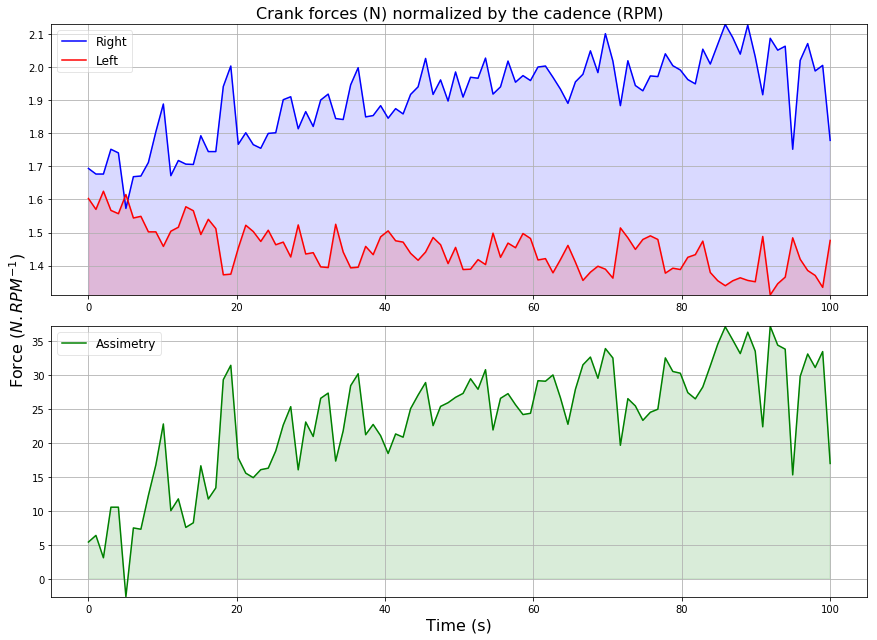

In [4]:
fig = plt.figure(figsize = (12, 9))
ax1 = fig.add_subplot(211)
ax1.plot(tempo_percent, force_D_percent_corr, label='Right', color='blue')
ax1.fill_between(tempo_percent, force_D_percent_corr, where=force_D_percent_corr>=line_zero_force_D_corr, interpolate=True, color='blue', alpha=0.15)
ax1.plot(tempo_percent, force_E_percent_corr, label='Left', color='red')
ax1.fill_between(tempo_percent, force_E_percent_corr, where=force_E_percent_corr>=line_zero_force_E_corr, interpolate=True, color='red', alpha=0.15)
ax1.set_ylim([min(force_E_percent_corr), max(force_D_percent_corr)])
ax1.set_title('Crank forces (N) normalized by the cadence (RPM)', fontsize=16)
ax1.grid()
ax1.legend(fontsize=12, loc='best', framealpha=.5)
ax2 = fig.add_subplot(212)
ax2.plot(tempo_percent, force_assimetry_percent_corr, label='Assimetry', color='green')
ax2.fill_between(tempo_percent, force_assimetry_percent_corr, where=force_assimetry_percent_corr>=line_zero_force_assimetry_corr, interpolate=True, color='green', alpha=0.15)
ax2.set_ylim([min(force_assimetry_percent_corr), max(force_assimetry_percent_corr)])
fig.text(0, 0.5, 'Force $(N.RPM^{-1})$', ha='center', va='center',
         rotation='vertical', fontsize=16)
ax2.grid()
ax2.set_xlabel('Time (s)', fontsize=16)
ax2.legend(fontsize=12, loc='best', framealpha=.5)
plt.tight_layout()

### Cadence

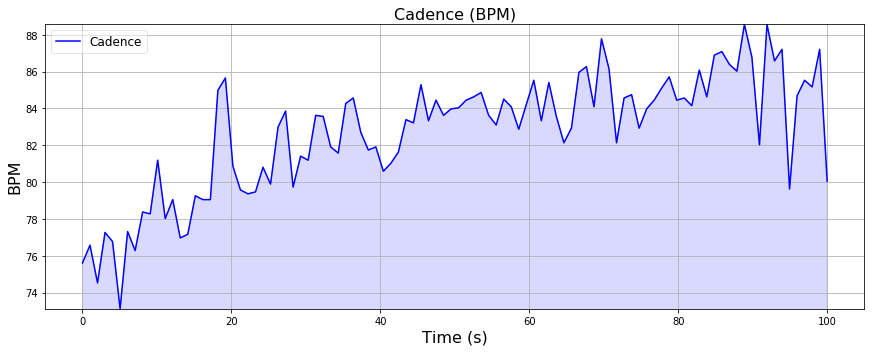

In [5]:
fig, ax = plt.subplots(1, 1, figsize = (12, 5))
ax.plot(tempo_percent, cadencia_percent, label='Cadence', color='blue')
ax.fill_between(tempo_percent, cadencia_percent, where=cadencia_percent>=line_zero_cadencia_percent, interpolate=True, color='blue', alpha=0.15)
ax.set_title('Cadence (BPM)', fontsize=16)
ax.set_ylim([min(cadencia_percent), max(cadencia_percent)])
fig.text(0, 0.5, 'BPM', ha='center', va='center',
         rotation='vertical', fontsize=16)
ax.grid()
ax.legend(fontsize=12, loc='best', framealpha=.5)
ax.set_xlabel('Time (s)', fontsize=16)
ax.legend(fontsize=12, loc='best', framealpha=.5)
plt.tight_layout()

### Electromyography RMS and Cocontraction Index

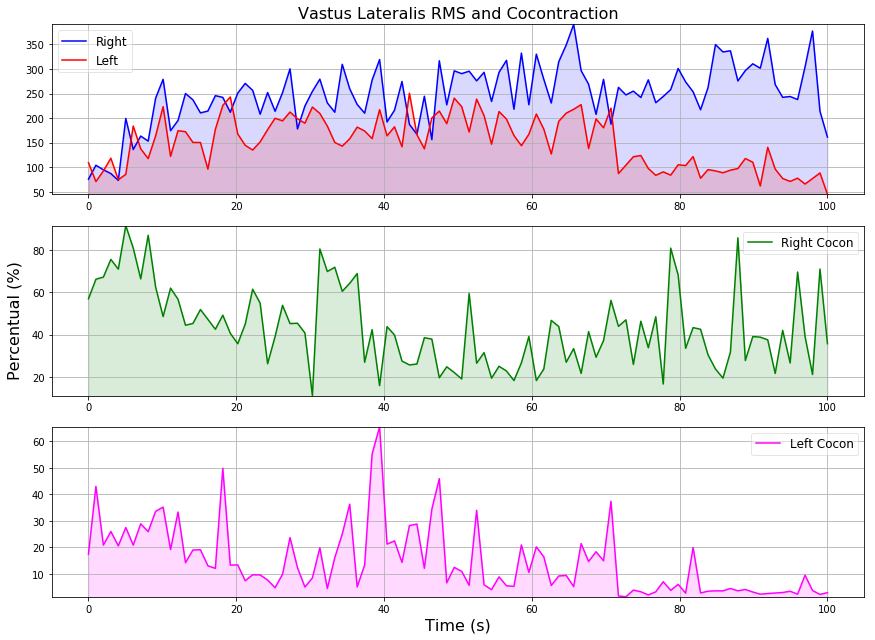

In [6]:
fig = plt.figure(figsize = (12, 9))
ax1 = fig.add_subplot(311)
ax1.plot(tempo_percent, emg1_rms_norm_percent, label='Right', color='blue')
ax1.fill_between(tempo_percent, emg1_rms_norm_percent, where=emg1_rms_norm_percent>=line_zero_emg1_rms_norm_percent, interpolate=True, color='blue', alpha=0.15)
ax1.plot(tempo_percent, emg2_rms_norm_percent, label='Left', color='red')
ax1.fill_between(tempo_percent, emg2_rms_norm_percent, where=emg2_rms_norm_percent>=line_zero_emg2_rms_norm_percent, interpolate=True, color='red', alpha=0.15)
ax1.set_ylim([min(emg2_rms_norm_percent), max(emg1_rms_norm_percent)])
ax1.set_title('Vastus Lateralis RMS and Cocontraction', fontsize=16)
ax1.grid()
ax1.legend(fontsize=12, loc='best', framealpha=.5)
ax2 = fig.add_subplot(312)
ax2.plot(tempo_percent, emg1_emg4_cocon_percent, label='Right Cocon', color='green')
ax2.fill_between(tempo_percent, emg1_emg4_cocon_percent, where=emg1_emg4_cocon_percent>=line_zero_emg1_emg4_cocon_percent, interpolate=True, color='green', alpha=0.15)
ax2.set_ylim([min(emg1_emg4_cocon_percent), max(emg1_emg4_cocon_percent)])
fig.text(0, 0.5, 'Percentual (%)', ha='center', va='center',
         rotation='vertical', fontsize=16)
ax2.grid()
ax2.legend(fontsize=12, loc='best', framealpha=.5)
ax3 = fig.add_subplot(313)
ax3.plot(tempo_percent, emg2_emg3_cocon_percent, label='Left Cocon', color='magenta')
ax3.fill_between(tempo_percent, emg2_emg3_cocon_percent, where=emg2_emg3_cocon_percent>=line_zero_emg2_emg3_cocon_percent, interpolate=True, color='magenta', alpha=0.15)
ax3.set_ylim([min(emg2_emg3_cocon_percent), max(emg2_emg3_cocon_percent)])
ax3.grid()
ax3.set_xlabel('Time (s)', fontsize=16)
ax3.legend(fontsize=12, loc='best', framealpha=.5)
plt.tight_layout()